In [1]:
%matplotlib inline
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

------------------

# Set stage
whales get entangled


Whales get sotted by planes, ships, and gliders.


https://environmental-action.org/wp-content/uploads/2018/02/180201-eac-va-right-whale-entangled-sea-to-shore.jpg

https://whalesandmarinefauna.files.wordpress.com/2013/01/628x471_004.jpg

http://mediad.publicbroadcasting.net/p/mpbn/files/styles/x_large/public/201805/12683617055_5f20872e81_k.jpg

https://media.mnn.com/assets/images/2017/12/TangledNorthAtlanticRightWhale.jpg




spoter planes
https://pbs.twimg.com/media/DdVa8ltX0AEo10V.jpg

https://assets.skiesmag.com/images/online/MaritimeProtector/1.jpg

https://assets.skiesmag.com/images/online/MaritimeProtector/4.jpg

http://www.releases.gov.nl.ca/releases/2013/fishaq/1216n04_pic.jpg

https://ssl.c.photoshelter.com/img-get2/I0000jNrkh7emj4Q/fit=1000x750/GSBCAN0401005.jpg

https://cdn.planespotters.net/photo/131000/original/c-gcfj-canada-transport-canada-de-havilland-canada-dhc-8-102-dash-8_PlanespottersNet_131307_cbd5848763.jpg

http://imgproc.airliners.net/photos/airliners/5/7/1/2711175.jpg?v=v40


https://twitter.com/FishOceansCAN/status/991054848538923008



Spoter vessels
CCGS Corporal McLaren M.M.V.
https://navaltoday.com/wp-content/uploads/2015/05/Canadian-Coast-Guard-Expands-Fleet.jpg

http://www.ccg-gcc.gc.ca/Vessel-Procurement/Gallery

------------------

------------------

Present the data (I think it is better to do this bit by bit... present each data set just before it is used)

- VMS data
http://cawebstore.romcomm.com/romtrax-wi-fi-vms-2

https://www.google.ca/imgres?imgurl=http%3A%2F%2Fsahabatmancing.com%2Fwp-content%2Fuploads%2F2017%2F08%2Fvessel-monitoring-aid-kkp.jpg&imgrefurl=http%3A%2F%2Fsahabatmancing.com%2Fupdates%2Fkkp-kini-punya-alat-pantau-kapal-perikanan-secara-real-time%2F&docid=G33MUa4MuPLA0M&tbnid=s3lhl5EeLQVv9M%3A&vet=1&w=800&h=444&bih=984&biw=1920&ved=2ahUKEwjhz_DLubLbAhUMzoMKHbBdDvIQxiAoA3oECAEQFw&iact=c&ictx=1

- WHale possitions

- PLane surveys

- Glider surveys

------------------


------------------
# Whale sightings

------------------

In [2]:
import pandas as pd

whales = pd.read_csv('whale_sightings.csv')

print(whales)

         Date  Latitude  Longitude  Number of right whales
0  2018-05-31  47.59990 -64.098750                       1
1  2018-05-27  48.15185 -63.381437                       1
2  2018-05-24  44.58650 -63.058000                       1
3  2018-05-24  44.63517 -62.678800                       1



------------------
basic "map-style" plotting (non projected)

------------------

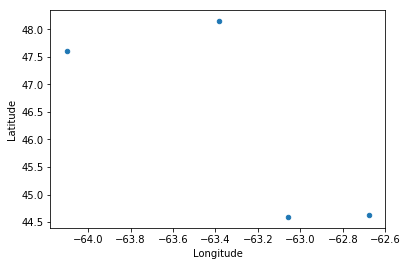

In [4]:
whales.plot(x='Longitude',y='Latitude',kind='scatter')

------------------
Basemap

------------------

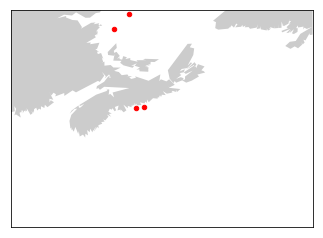

In [3]:
from mpl_toolkits.basemap import Basemap

# Create map
m = Basemap(projection='mill',
            llcrnrlat=39.9,
            urcrnrlat=48.3,
            llcrnrlon=-69,
            urcrnrlon=-54.7,
            resolution='l')

x, y = m(whales['Longitude'].values,whales['Latitude'].values)

cs = m.scatter(x,y,s=20,marker='o',color='r')

m.fillcontinents()

In [5]:
def make_basemap():    
    from mpl_toolkits.basemap import Basemap

    # Create map
    m = Basemap(projection='mill',
                llcrnrlat=39.9,
                urcrnrlat=48.3,
                llcrnrlon=-69,
                urcrnrlon=-54.7,
                resolution='l')
    
    m.fillcontinents()
    return m



def plot_whales(whales, m):    
    x, y = m(whales['Longitude'].values,whales['Latitude'].values)

    cs = m.scatter(x,y,s=40,marker='o',color='r',zorder=50)
    return

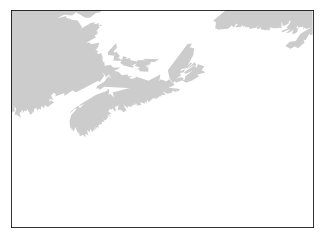

In [6]:
make_basemap()

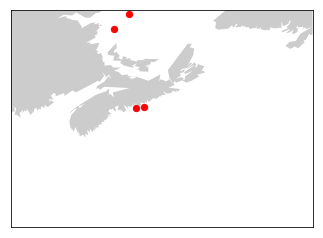

In [7]:
make_basemap()
plot_whales(whales, m)

In [8]:
def make_basemap():
    import matplotlib.pyplot as plt
    from mpl_toolkits.basemap import Basemap
    
    fig1 = plt.figure(figsize=(20,14))

    # Create map
    m = Basemap(projection='mill',
                llcrnrlat=39.9,
                urcrnrlat=48.3,
                llcrnrlon=-69,
                urcrnrlon=-54.7,
                resolution='i')
    
    m.drawcoastlines(color='#a6a6a6',linewidth=0.5,zorder=42)
    m.fillcontinents(color='#e6e6e6',zorder=42)
    m.drawmapboundary()
    return m

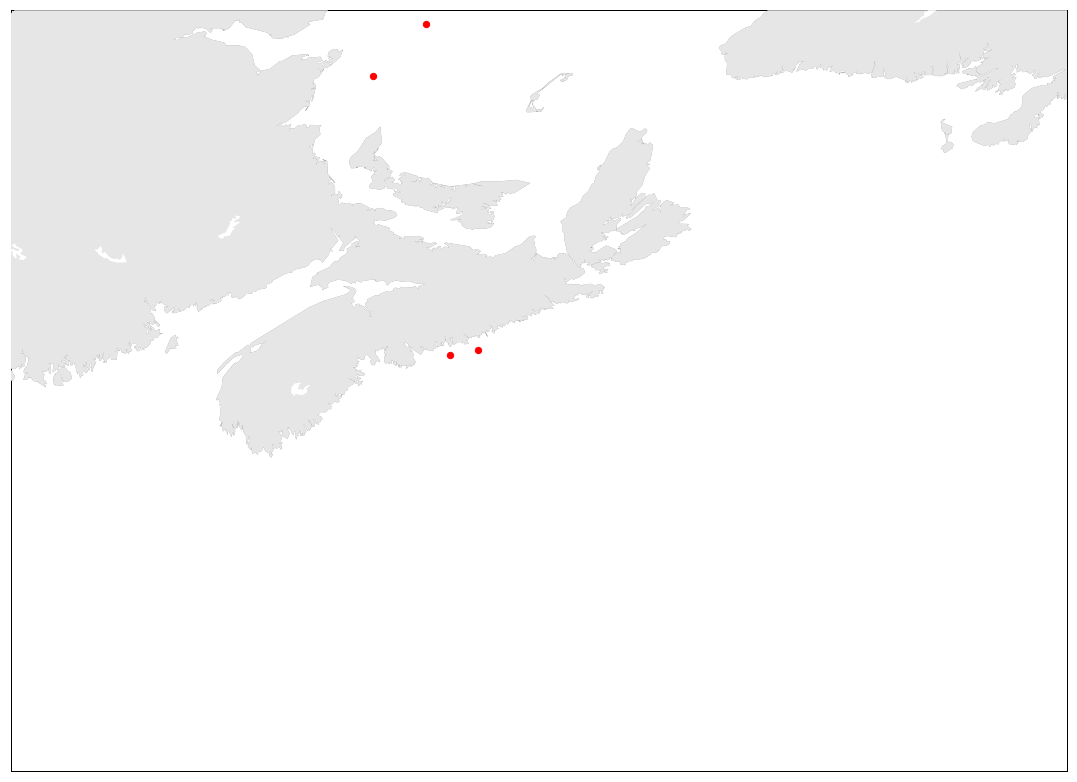

In [9]:
m = make_basemap()
plot_whales(whales, m)

In [10]:
def add_maritimes_region(m):
    import numpy as np
    import shapefile
    sf = shapefile.Reader("M:\\OCMD\\01_Data\\Management_Areas\\Administrative_Boundaries\\RegionalPolygon_Maritimes_OCMD_2013\\OriginalData\\MaritimesRegionPolygon_UpdatedSept2015_wgs84")
    for shape in list(sf.iterShapes()):
        npoints=len(shape.points) # total points
        nparts = len(shape.parts) # total parts

        if nparts == 1:
           poly_lons = np.zeros((len(shape.points),1))
           poly_lats = np.zeros((len(shape.points),1))
           for ip in range(len(shape.points)):
               poly_lons[ip] = shape.points[ip][0]
               poly_lats[ip] = shape.points[ip][1]

           plot_polygon(poly_lons, poly_lats)

        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0=shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = npoints

            seg=shape.points[i0:i1+1]
            poly_lons = np.zeros((len(seg),1))
            poly_lats = np.zeros((len(seg),1))
            for ip in range(len(seg)):
                poly_lons[ip] = seg[ip][0]
                poly_lats[ip] = seg[ip][1]

            plot_polygon(poly_lons, poly_lats,m, edgecolor='#ff0000',linewidth=1.0,alpha=0.6,zorder=40)
    return


def plot_polygon(poly_lons, poly_lats, m, edgecolor='#a6a6a6',linewidth=0.5,alpha=0.3,zorder=2):
    import numpy as np
    from matplotlib.patches import Polygon
    import matplotlib.pyplot as plt
    poly_x, poly_y = m(poly_lons, poly_lats)
    poly_xy = np.transpose(np.array((poly_x[:,0], poly_y[:,0])))
    
    # Ad polygon
    poly = Polygon(poly_xy,
                   closed=True,
                   edgecolor=edgecolor,
                   linewidth=linewidth,
                   alpha=alpha,
                   fill=False,
                   zorder=zorder)
    
    plt.gca().add_patch(poly)
    return

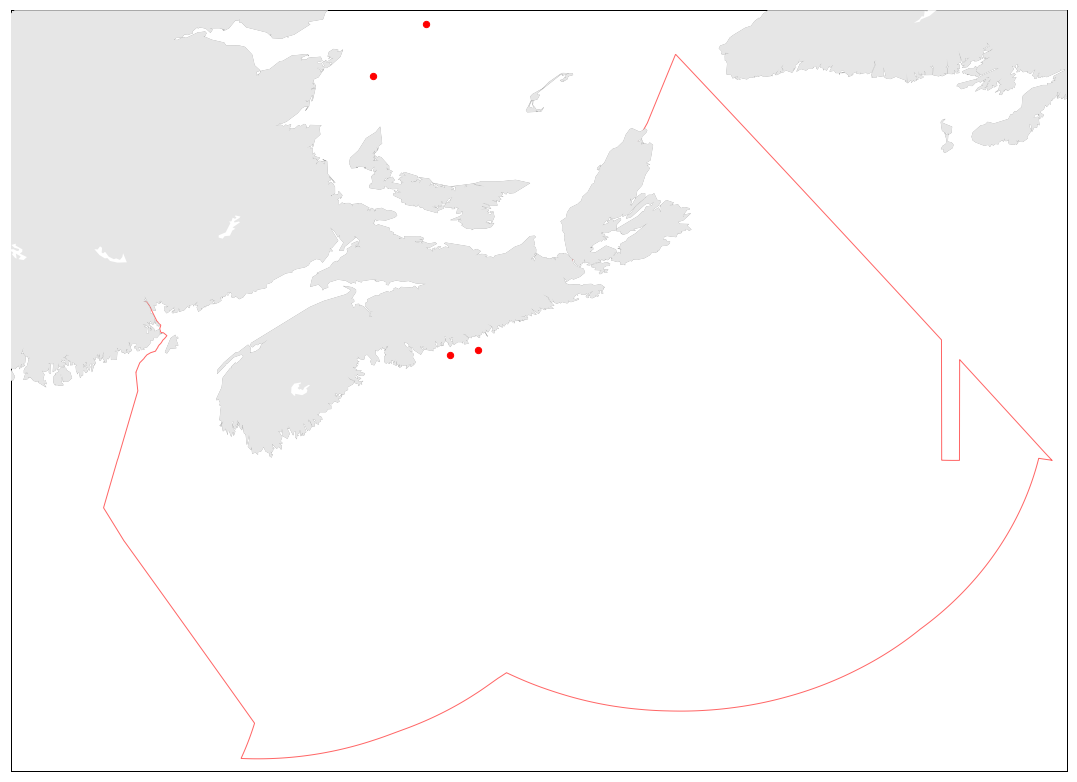

In [11]:
m = make_basemap()
plot_whales(whales, m)
add_maritimes_region(m)

In [12]:
def add_NAFO_areas(m):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.patches import Polygon
    import shapefile


    sf = shapefile.Reader("M:\\OCMD\\01_Data\\Management_Areas\\Fisheries\\FishingZones_NEAtlantic_NAFO_2011\\ValueAdded\\NAFO_SubUnits_CanAtlantic")
    
    for shape in list(sf.iterShapes()):
        npoints=len(shape.points) # total points
        nparts = len(shape.parts) # total parts

        if nparts == 1:
           poly_lons = np.zeros((len(shape.points),1))
           poly_lats = np.zeros((len(shape.points),1))
           for ip in range(len(shape.points)):
               poly_lons[ip] = shape.points[ip][0]
               poly_lats[ip] = shape.points[ip][1]

           plot_polygon(poly_lons, poly_lats,m, edgecolor='#a6a6a6',linewidth=0.5,alpha=0.5,zorder=20)

        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0=shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = npoints

            seg=shape.points[i0:i1+1]
            poly_lons = np.zeros((len(seg),1))
            poly_lats = np.zeros((len(seg),1))
            for ip in range(len(seg)):
                poly_lons[ip] = seg[ip][0]
                poly_lats[ip] = seg[ip][1]

            plot_polygon(poly_lons, poly_lats, m, edgecolor='#a6a6a6',linewidth=0.5,alpha=0.5,zorder=20)
    
   # NAFO labels
    nafo = pd.read_csv('M:\\OCMD\\02_Projects\\IOM\\NARW_ResourceMgmt\\NAFO_subunit_centroids.csv')

    zones = pd.unique(nafo['UnitArea'].values)


    for zone in zones:
        zone_points = nafo[nafo['UnitArea'] == zone]
        lat = zone_points['ddlat'].values[0]
        lon = zone_points['ddlong'].values[0]
        if lat > 39.9 and lat < 48.3 and lon > -69 and lon < -54.7:
            plot_label(lon, lat, zone, m)

    return
        
        
        



def plot_label(lon, lat, zone, m):
    import matplotlib.pyplot as plt
    x, y = m(lon, lat)
    plt.text(x, y, zone, fontsize=9,color='#a6a6a6',zorder=35)
    return

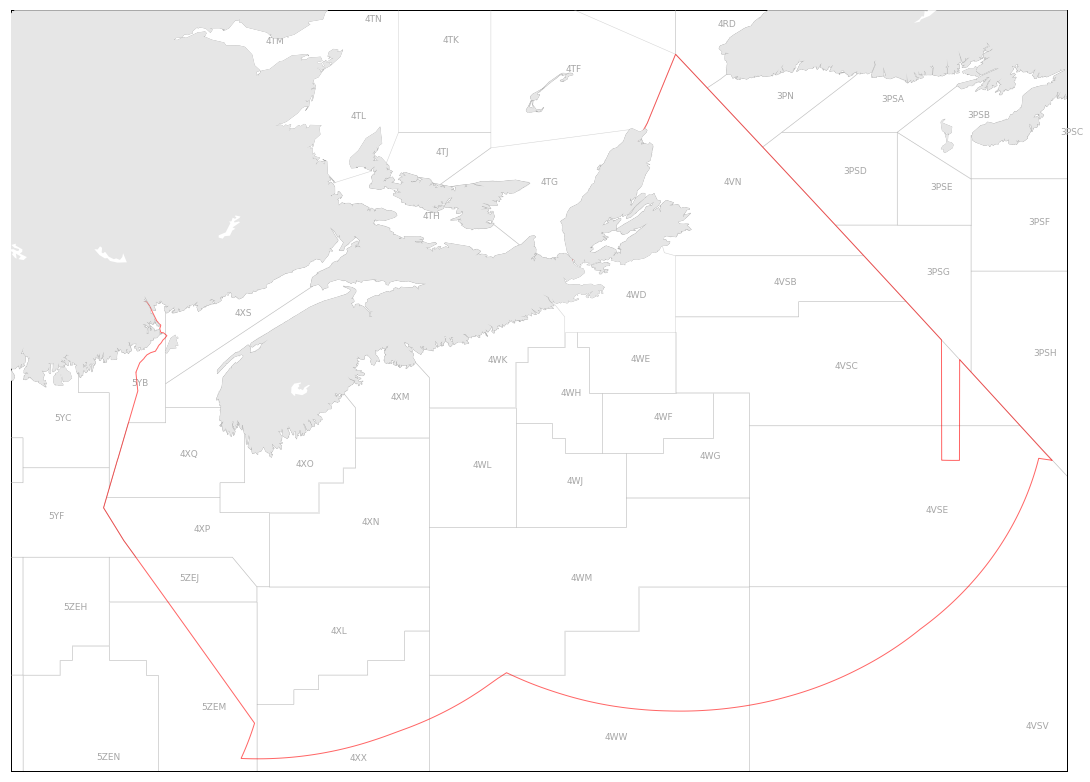

In [13]:
m = make_basemap()
#plot_whales(whales,m)
add_maritimes_region(m)
add_NAFO_areas(m)

In [14]:
def add_bathymetry(m):
    import matplotlib.pyplot as plt
    import netCDF4
    import urllib.request
    import numpy as np
    bathymetry_file = 'usgsCeSrtm30v6.nc'

    minlat=39.9
    maxlat=48.3
    minlon=-69
    maxlon=-54.7
    
    isub = 1
    base_url='http://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.nc?'
    query='topo[(%f):%d:(%f)][(%f):%d:(%f)]' % (maxlat,isub,minlat,minlon,isub,maxlon)
    url = base_url+query
    # store data in NetCDF file
    urllib.request.urlretrieve(url, bathymetry_file)

    # open NetCDF data in
    nc = netCDF4.Dataset(bathymetry_file)
    ncv = nc.variables
    lon = ncv['longitude'][:]
    lat = ncv['latitude'][:]
    lons, lats = np.meshgrid(lon, lat)
    topo = ncv['topo'][:, :]
    
    TOPOmasked = np.ma.masked_where(topo>0,topo)

    # For topo
    x, y = m(lons, lats)
    plt.pcolormesh(x,y,TOPOmasked,cmap=plt.get_cmap('Blues_r'),zorder=5,vmax=2000)

    depth_levels_1 = np.linspace(topo.min(), -700, num=5)

    depth_levels = np.append(depth_levels_1,np.linspace(-650, -50, num=15))

    depth_levels = depth_levels.tolist()

    cs = plt.contour(
        x,
        y,
        topo,
        depth_levels,
        cmap=plt.get_cmap('Blues_r'),
        linewidths=0.3,
        linestyles='solid',
        zorder=19)
    return

------------------
Make a basemap with bathymetry, and features

------------------

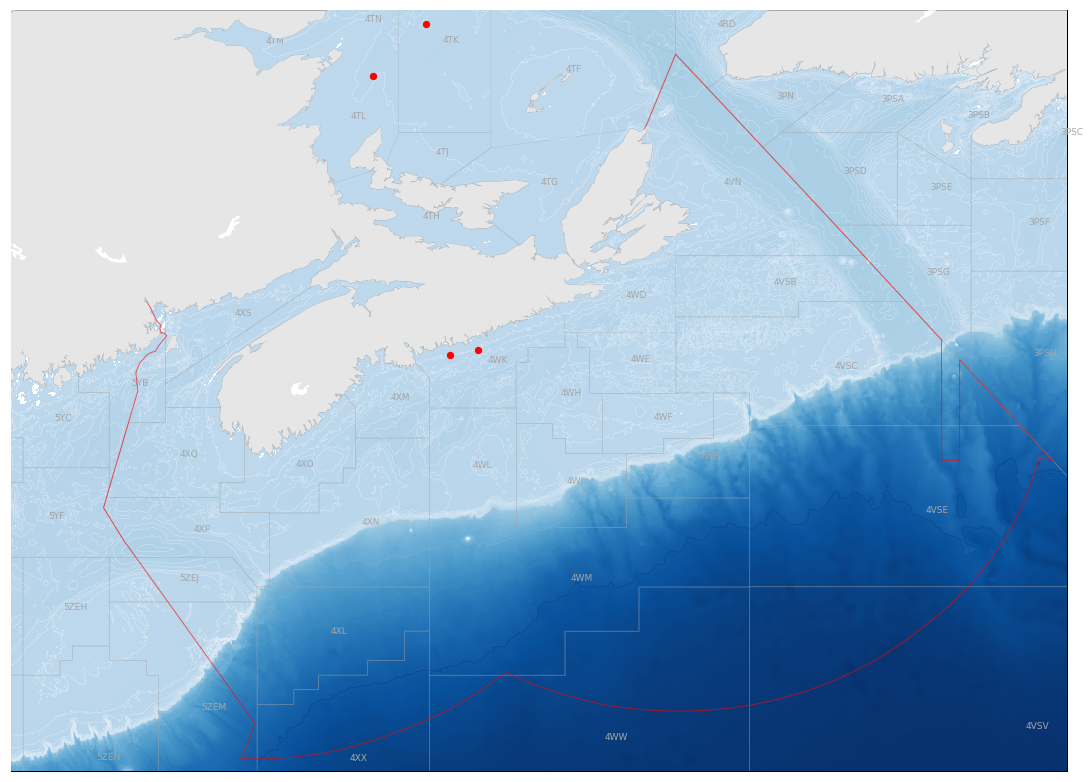

In [15]:
m = make_basemap()

plot_whales(whales,m)
add_maritimes_region(m)
add_NAFO_areas(m)
add_bathymetry(m)

------------------
Save basemap with pickle

------------------

------------------
OPen basemap, replot whales

------------------


------------------
# VMS

------------------

In [16]:
vms_csv = r'C:\Users\IbarraD\Data\VMS_DFO_Oracle\data_original\vms_autoDownloaded.csv'

fishing = pd.read_csv(vms_csv)

print(fishing)

       VR_NUMBER   LATITUDE  LONGITUDE    POSITION_UTC_DATE
0         105912  42.083000 -66.652000  2018-05-25 06:00:01
1         106604  42.130820 -66.917840  2018-05-25 06:00:01
2         107314  43.441650 -65.208410  2018-05-25 06:00:01
3         101019  43.744230 -65.317730  2018-05-25 06:00:01
4         100247  44.477891 -63.600112  2018-05-25 06:00:01
5         107918  44.478235 -63.599082  2018-05-25 06:00:01
6         103677  44.632472 -65.747166  2018-05-25 06:00:01
7         104994  44.729118 -63.008567  2018-05-25 06:00:01
8           7488  44.736580 -62.830900  2018-05-25 06:00:01
9         106311  44.907302 -65.867158  2018-05-25 06:00:01
10        103394  44.943523 -66.920558  2018-05-25 06:00:01
11        106991  44.949290 -65.265530  2018-05-25 06:00:01
12        107553  45.011210 -58.887130  2018-05-25 06:00:01
13        108065  45.053987 -66.798592  2018-05-25 06:00:01
14        103923  45.122180 -66.351250  2018-05-25 06:00:01
15        107204  45.231490 -60.181800  

------------------
OPen basemap, replot VMS

------------------

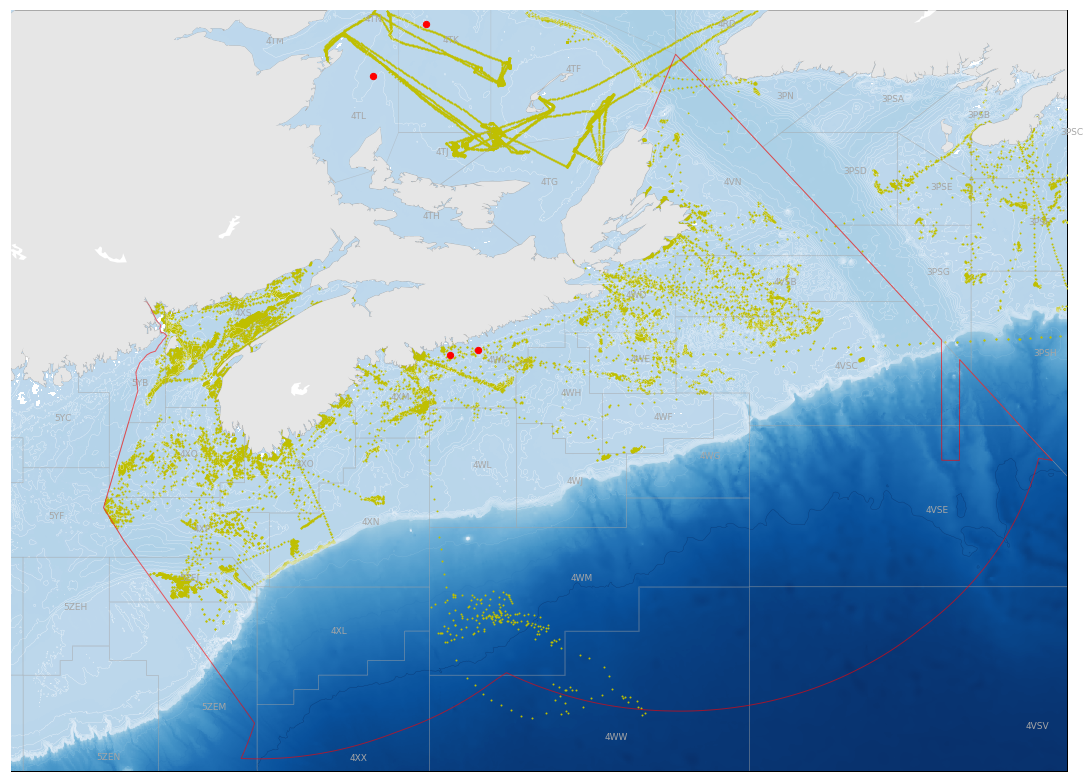

In [17]:

import matplotlib.pyplot as plt

m = make_basemap()

plot_whales(whales,m)
add_maritimes_region(m)
add_NAFO_areas(m)
add_bathymetry(m)

x, y = m(fishing['LONGITUDE'].values,fishing['LATITUDE'].values)

plt.scatter(x,y,s=1,marker='o',color='y',  zorder=10)



------------------
Filter by species

------------------

------------------
Filter by speed

------------------

------------------
Install ship_mapper

------------------

------------------
Use ship_mapper to make fishing density heatmap

------------------

------------------
Supperimpose whale locations

------------------

In [18]:
super impose 

SyntaxError: invalid syntax (<ipython-input-18-694e9f1028c5>, line 1)